In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import zscore                                       
from sklearn.preprocessing import StandardScaler                 

from scipy.cluster.hierarchy import dendrogram, linkage, fcluster, centroid          
from sklearn.cluster import KMeans                                    

from sklearn.metrics import silhouette_samples, silhouette_score     

from statsmodels.tsa.seasonal import seasonal_decompose

import pandas_profiling

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
sns.set(color_codes=True)
sns.set_palette('Accent_r')

%config InlineBackend.figure_format ='retina'

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.rcParams['figure.figsize'] = 16, 9

In [2]:
pip install pandas-profiling

  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27085 sha256=7a65cf96c1e503be452641b819406f6e1cef45e8129633c0c7023ad79649499f
  Stored in directory: c:\users\srivi\appdata\local\pip\cache\wheels\23\14\6e\4be5bfeeb027f4939a01764b48edd5996acf574b0913fe5243
  Created wheel for imagehash: filename=ImageHash-4.2.1-py2.py3-none-any.whl size=295198 sha256=f908e52433129a934f0502a28430fe8efe7178b3db1cb19804ace8c7ed6676ae
  Stored in directory: c:\users\srivi\appdata\local\pip\cache\wheels\48\a1\7f\096c1269d6bf78d4768180602579b35a1e8cb1250bb4b40c74



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
anaconda-project 0.9.1 requires ruamel-yaml, which is not installed.
sphinx 4.0.1 requires MarkupSafe<2.0, but you have markupsafe 2.0.1 which is incompatible.


Successfully built htmlmin imagehash
  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 1.1.1
    Uninstalling MarkupSafe-1.1.1:
      Successfully uninstalled MarkupSafe-1.1.1


In [5]:
df = pd.read_csv('C:\\Users\\srivi\\Downloads\\dataset_group.csv')
df.head(10).to_csv('df_head.csv')
df.head(10)

,Date,Order_id,Product
0,01-01-2018,1,yogurt
1,01-01-2018,1,pork
2,01-01-2018,1,sandwich bags
3,01-01-2018,1,lunch meat
4,01-01-2018,1,all- purpose
5,01-01-2018,1,flour
6,01-01-2018,1,soda
7,01-01-2018,1,butter
8,01-01-2018,1,beef
9,01-01-2018,1,aluminum foil


In [6]:
df.shape

(20641, 3)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      20641 non-null  object
 1   Order_id  20641 non-null  int64 
 2   Product   20641 non-null  object
dtypes: int64(1), object(2)
memory usage: 483.9+ KB


In [8]:
df.describe().T.to_csv('describe_num.csv');
df.describe(include='object').T.to_csv('describe_cat.csv');

df.describe(include='object').T
df.describe().T

,count,unique,top,freq
Date,20641,603,08-02-2019,183
Product,20641,37,poultry,640


,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [11]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20641 entries, 0 to 20640
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      20641 non-null  datetime64[ns]
 1   Order_id  20641 non-null  int64         
 2   Product   20641 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 483.9+ KB


In [12]:
df.describe().T.to_csv('describe_num.csv');
df.describe(include='object').T.to_csv('describe_cat.csv');

df.describe(include='object').T
df.describe().T

,count,unique,top,freq
Product,20641,37,poultry,640


,count,mean,std,min,25%,50%,75%,max
Order_id,20641.0,575.986289,328.557078,1.0,292.0,581.0,862.0,1139.0


In [13]:
df_datesplit = df.copy()

In [14]:
df_datesplit['YEAR'] = pd.PeriodIndex(df_datesplit['Date'], freq='Y')
df_datesplit['MONTH'] = pd.PeriodIndex(df_datesplit['Date'], freq='M')
df_datesplit['QUARTER'] = pd.PeriodIndex(df_datesplit['Date'], freq='Q')
df_datesplit['WEEK'] = pd.PeriodIndex(df_datesplit['Date'], freq='W')

In [15]:
df_datesplit['DAY'] = df_datesplit.Date.dt.strftime('%A')
df_datesplit['MONTH_NAME'] = df_datesplit['Date'].dt.strftime('%b')

In [16]:
df_datesplit.head()

,Date,Order_id,Product,YEAR,MONTH,QUARTER,WEEK,DAY,MONTH_NAME
0,2018-01-01,1,yogurt,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
1,2018-01-01,1,pork,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
2,2018-01-01,1,sandwich bags,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
3,2018-01-01,1,lunch meat,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan
4,2018-01-01,1,all- purpose,2018,2018-01,2018Q1,2018-01-01/2018-01-07,Monday,Jan


In [17]:
print('First date of Sales data = ', min(df_datesplit['Date']))
print('Last date of Sales data = ', max(df_datesplit['Date']))

First date of Sales data =  2018-01-01 00:00:00
Last date of Sales data =  2020-02-26 00:00:00


In [18]:
df3 = df_datesplit.copy()
df_yr = pd.DataFrame(df3[['YEAR', 'Order_id', 'Product']].groupby('YEAR').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_yr.rename(columns=newname, inplace=True)
df_yr

,Num_of_Orders,Num_of_Products
YEAR,,
2018,533,9479
2019,507,9333
2020,99,1829


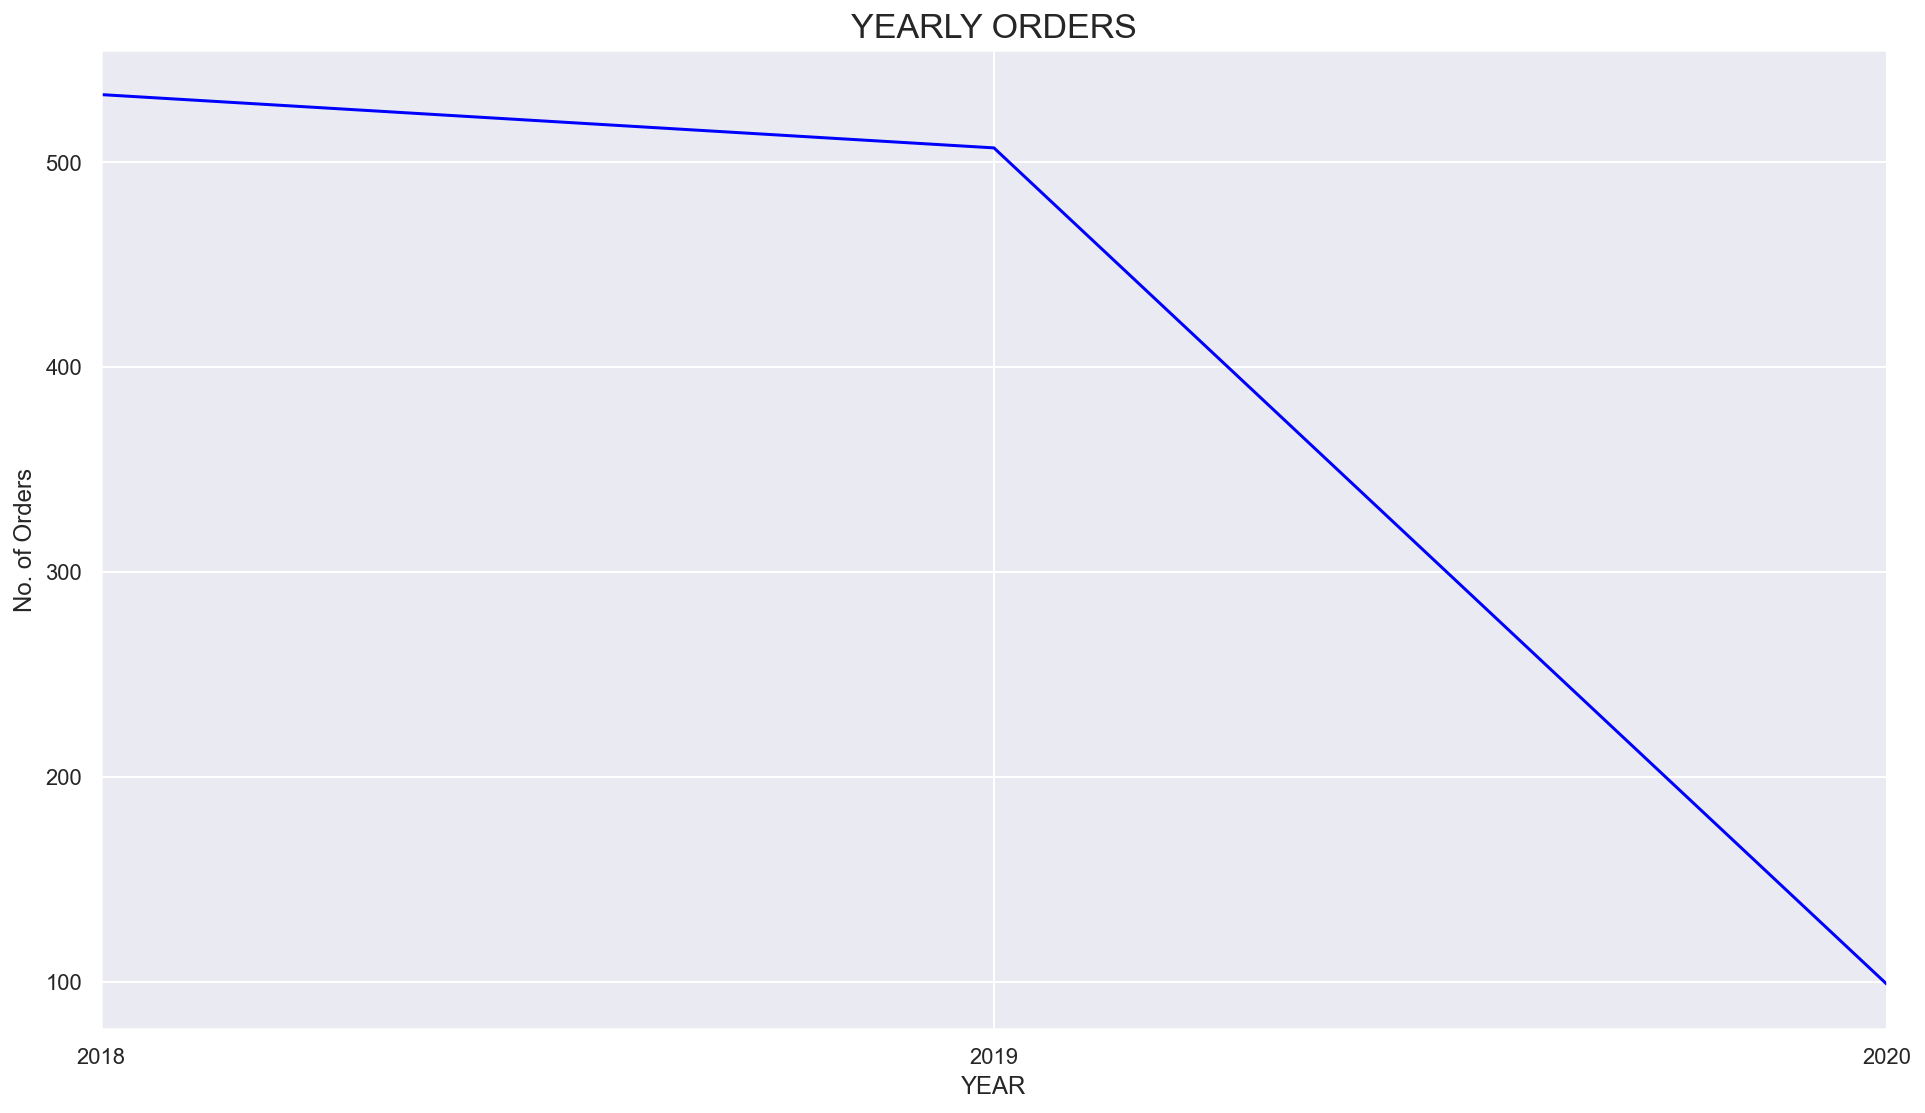

In [19]:
df_yr['Num_of_Orders'].plot(color='blue');
plt.ylabel('No. of Orders');
plt.title('YEARLY ORDERS', fontsize=17)
plt.savefig('ts_YEAR_order.jpg', bbox_inches='tight');

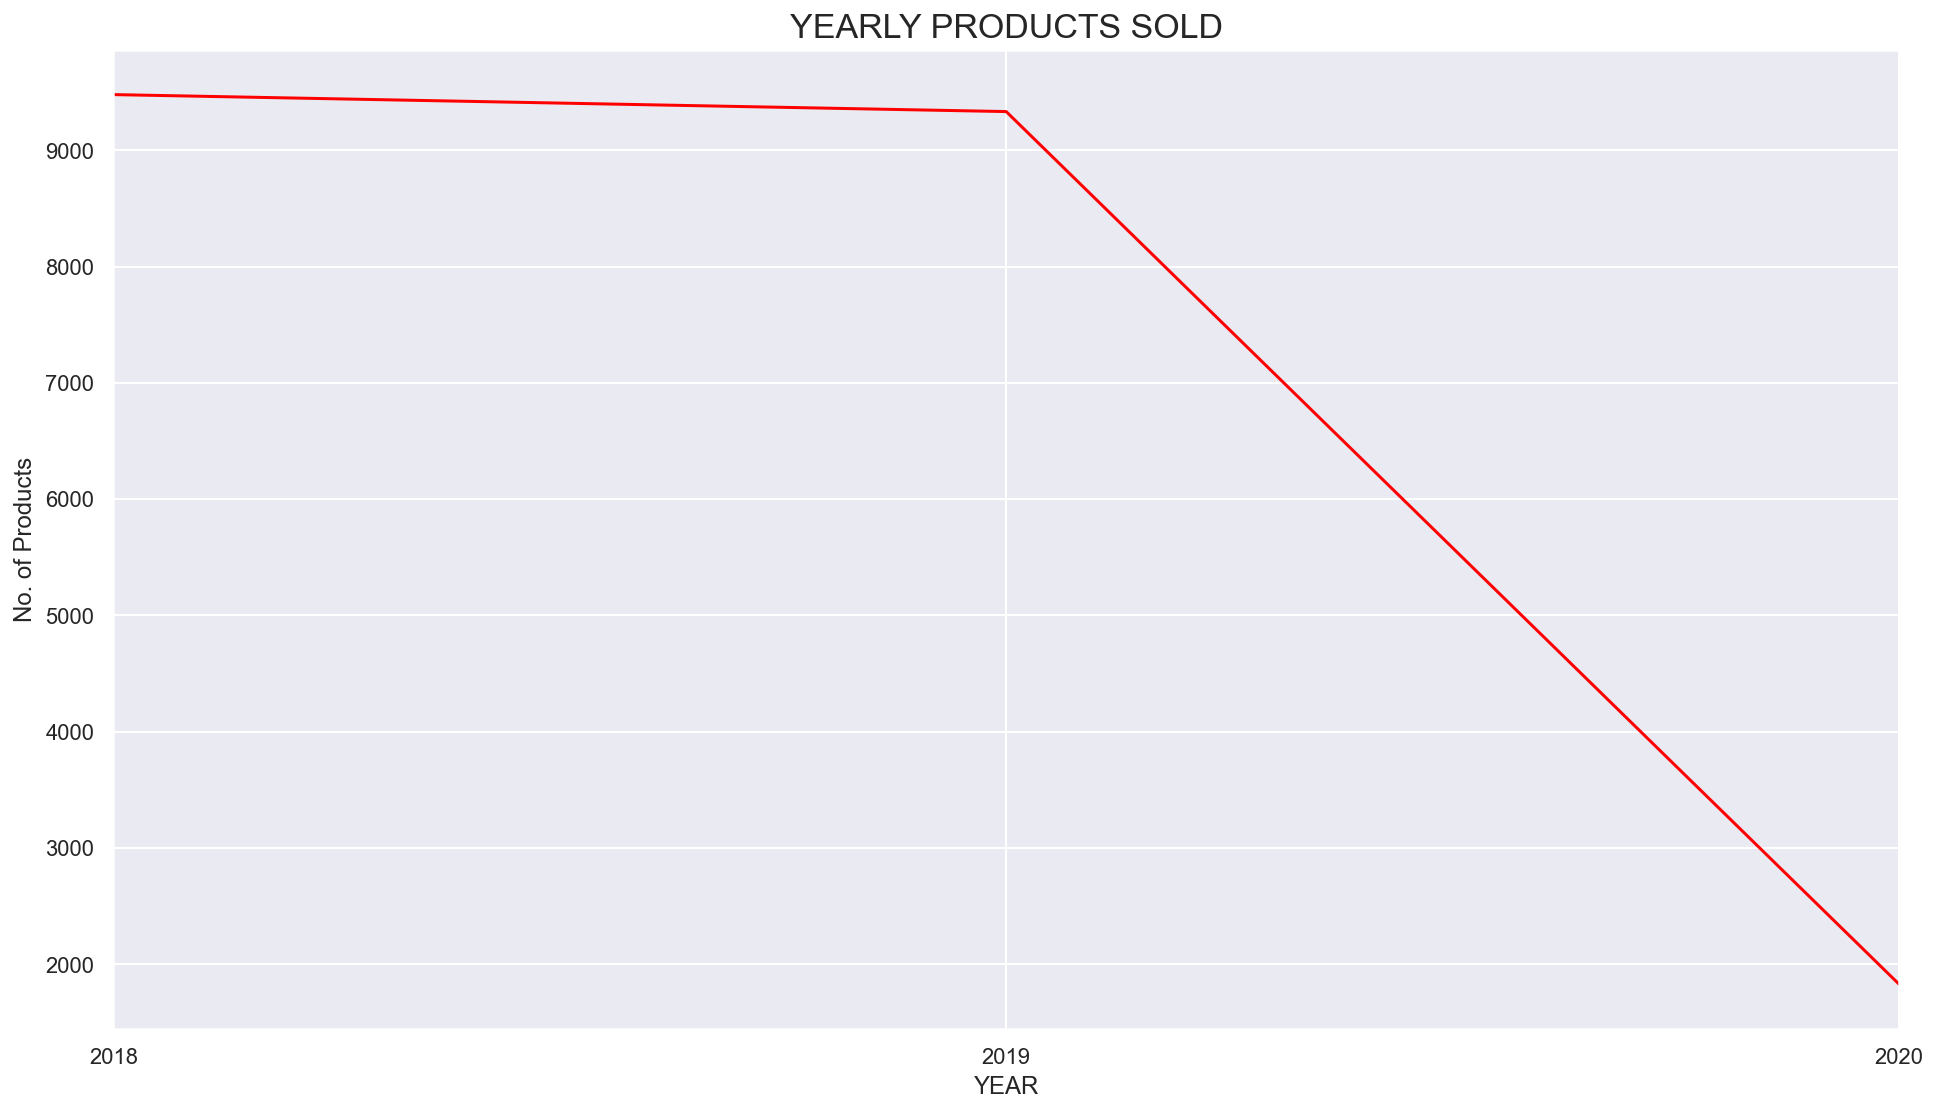

In [20]:
df_yr['Num_of_Products'].plot(color='red');
plt.ylabel('No. of Products');
plt.title('YEARLY PRODUCTS SOLD', fontsize=17)
plt.savefig('ts_YEAR_prod.jpg', bbox_inches='tight');

In [21]:
df3 = df_datesplit.copy()
df_qtr = pd.DataFrame(df3[['QUARTER', 'Order_id', 'Product']].groupby('QUARTER').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_qtr.rename(columns=newname, inplace=True)
df_qtr

,Num_of_Orders,Num_of_Products
QUARTER,,
2018Q1,175,3114
2018Q2,178,3047
2018Q3,180,3318
2019Q1,180,3354
2019Q2,170,3054
2019Q3,157,2925
2020Q1,99,1829


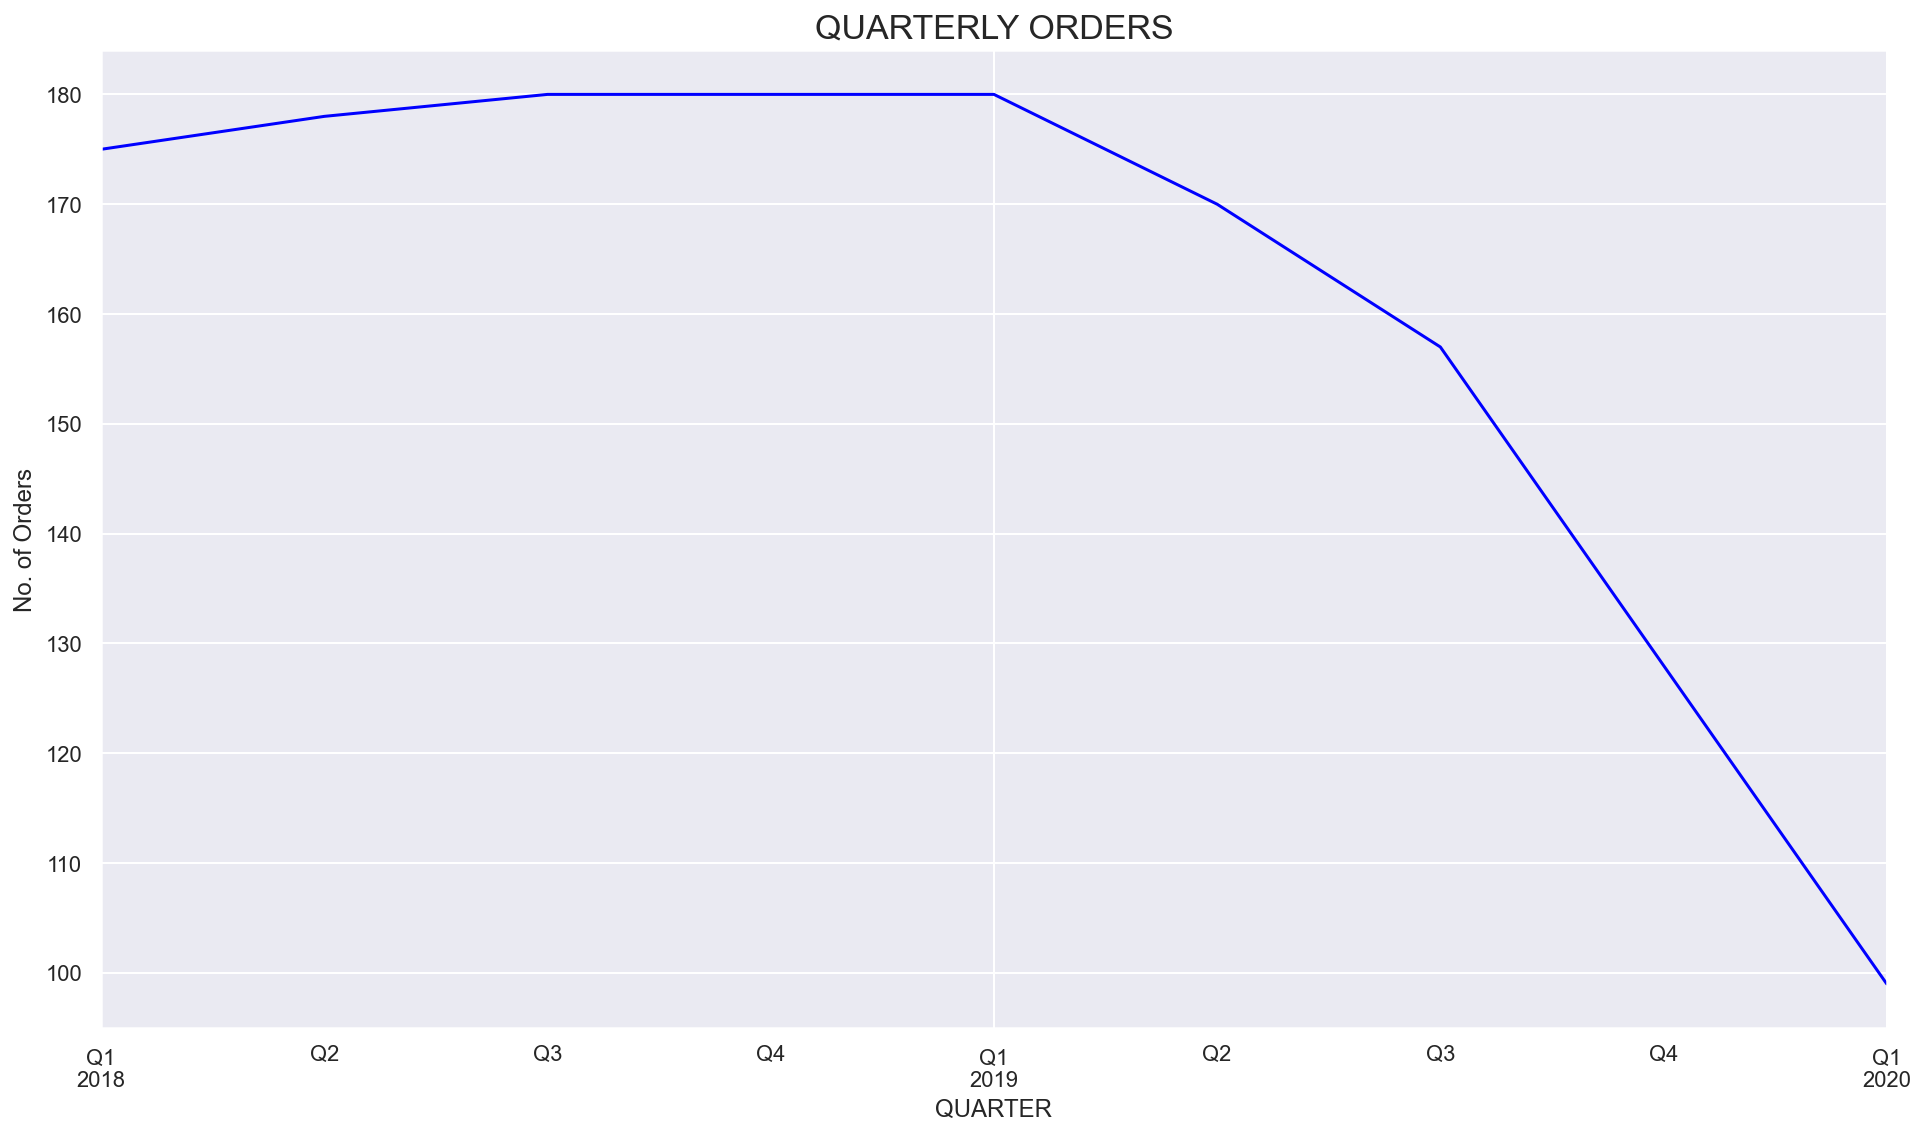

In [22]:
df_qtr['Num_of_Orders'].plot(color='blue');
plt.ylabel('No. of Orders');
plt.title('QUARTERLY ORDERS', fontsize=17)
plt.savefig('ts_qtr_order.jpg', bbox_inches='tight');


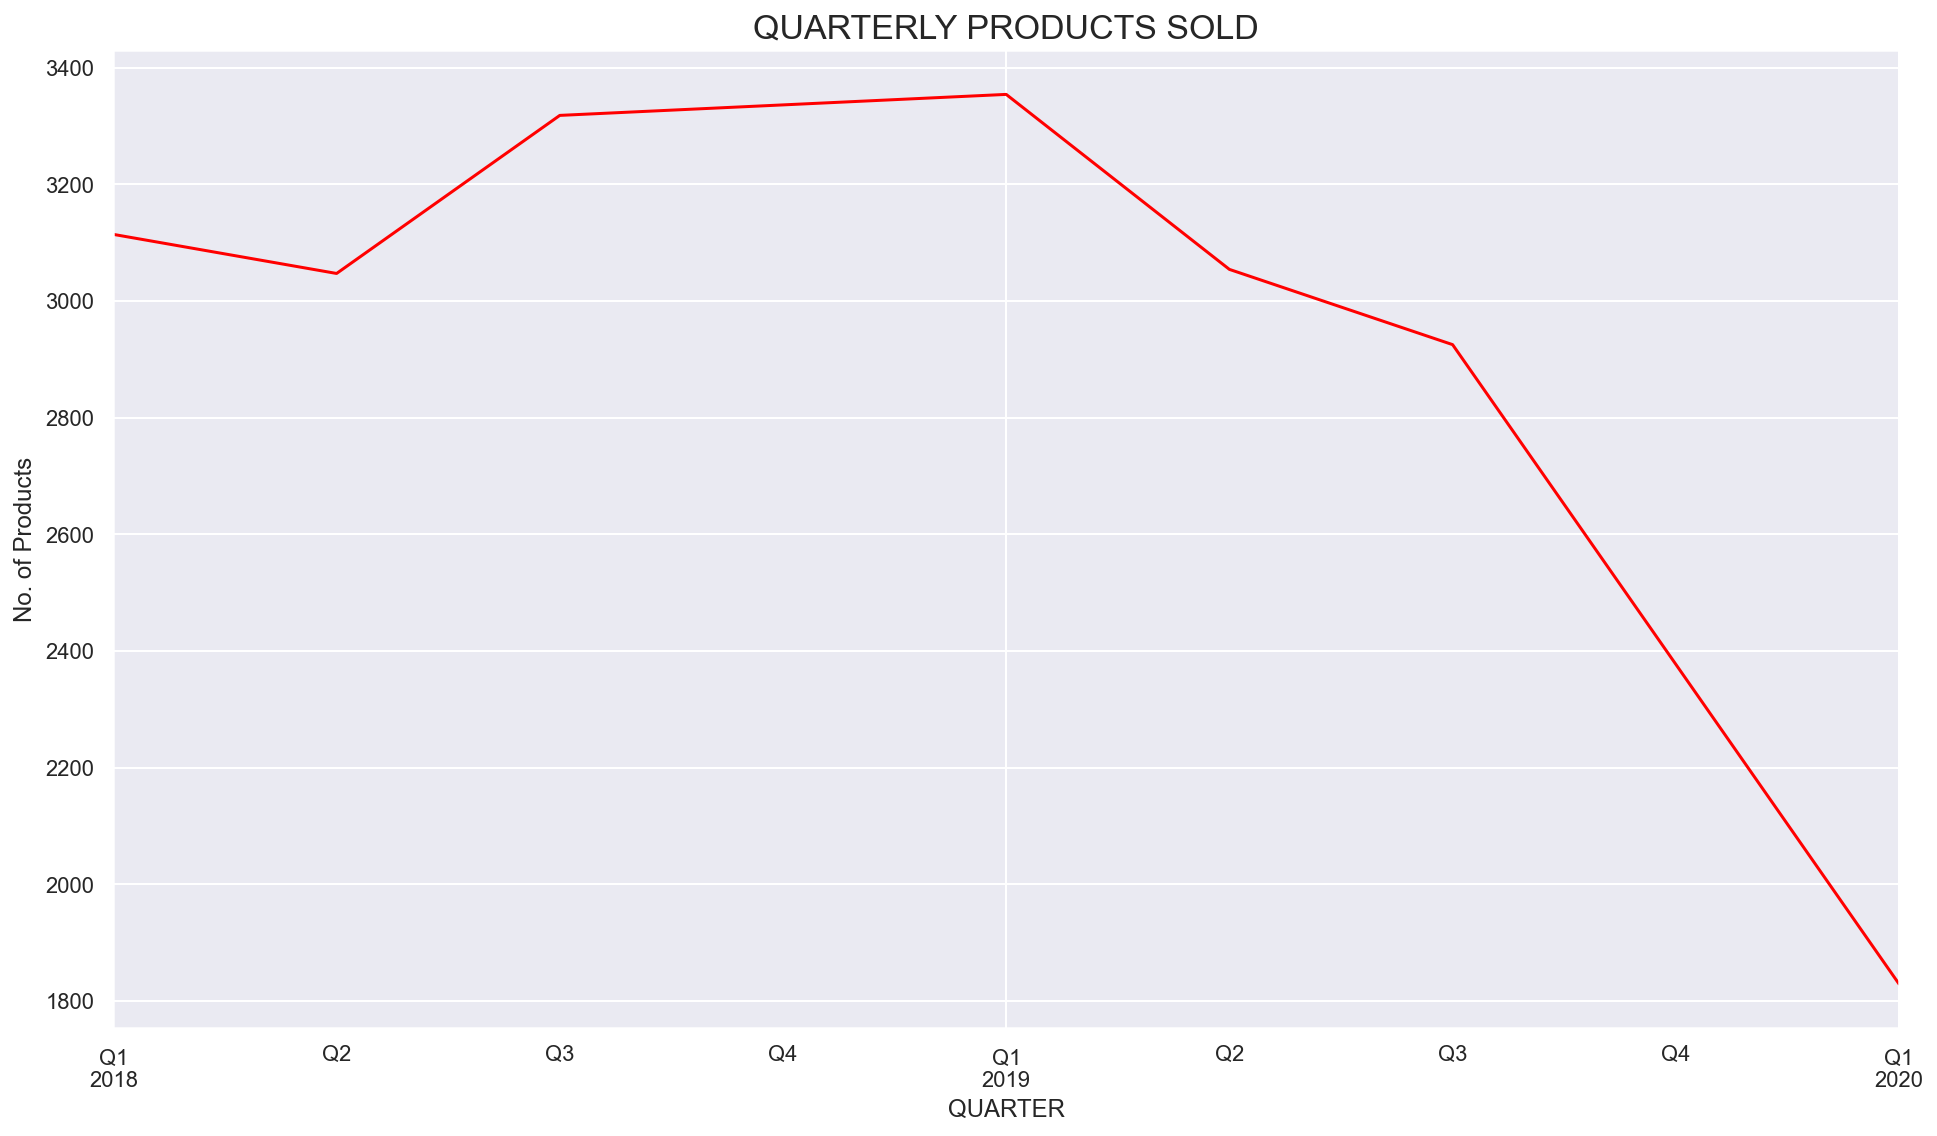

In [23]:
df_qtr['Num_of_Products'].plot(color='red');
plt.ylabel('No. of Products');
plt.title('QUARTERLY PRODUCTS SOLD', fontsize=17)
plt.savefig('ts_qtr_prod.jpg', bbox_inches='tight');

In [24]:
df3 = df_datesplit.copy()
df_month = pd.DataFrame(df3[['MONTH', 'Order_id', 'Product']].groupby('MONTH').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_month.rename(columns=newname, inplace=True)
df_month

,Num_of_Orders,Num_of_Products
MONTH,,
2018-01,62,1170
2018-02,55,907
2018-03,58,1037
2018-04,55,962
2018-05,67,1155
2018-06,56,930
2018-07,62,1054
2018-08,59,1159
2018-09,59,1105


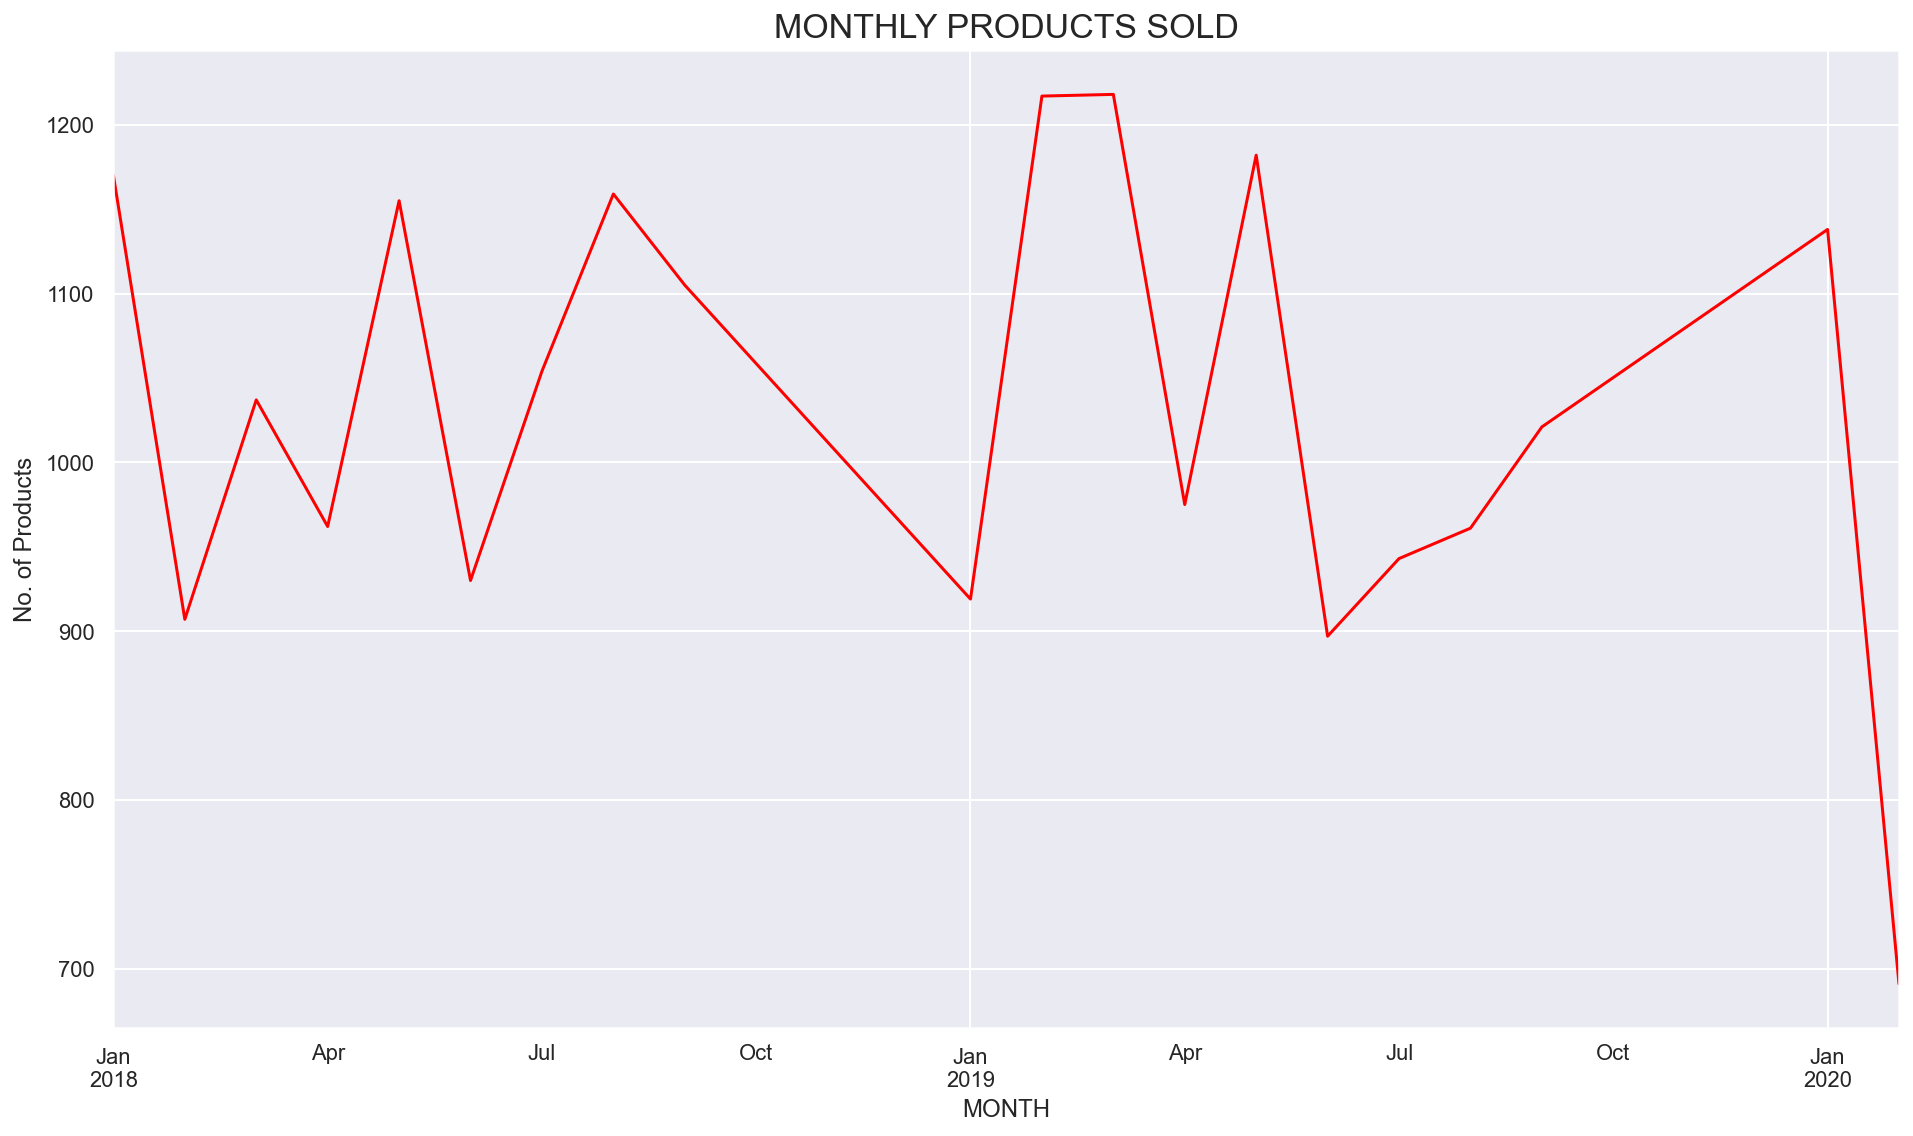

In [25]:
df_month['Num_of_Products'].plot(color='red');
plt.ylabel('No. of Products');
plt.title('MONTHLY PRODUCTS SOLD', fontsize=17)
plt.savefig('ts_month_prod.jpg', bbox_inches='tight');

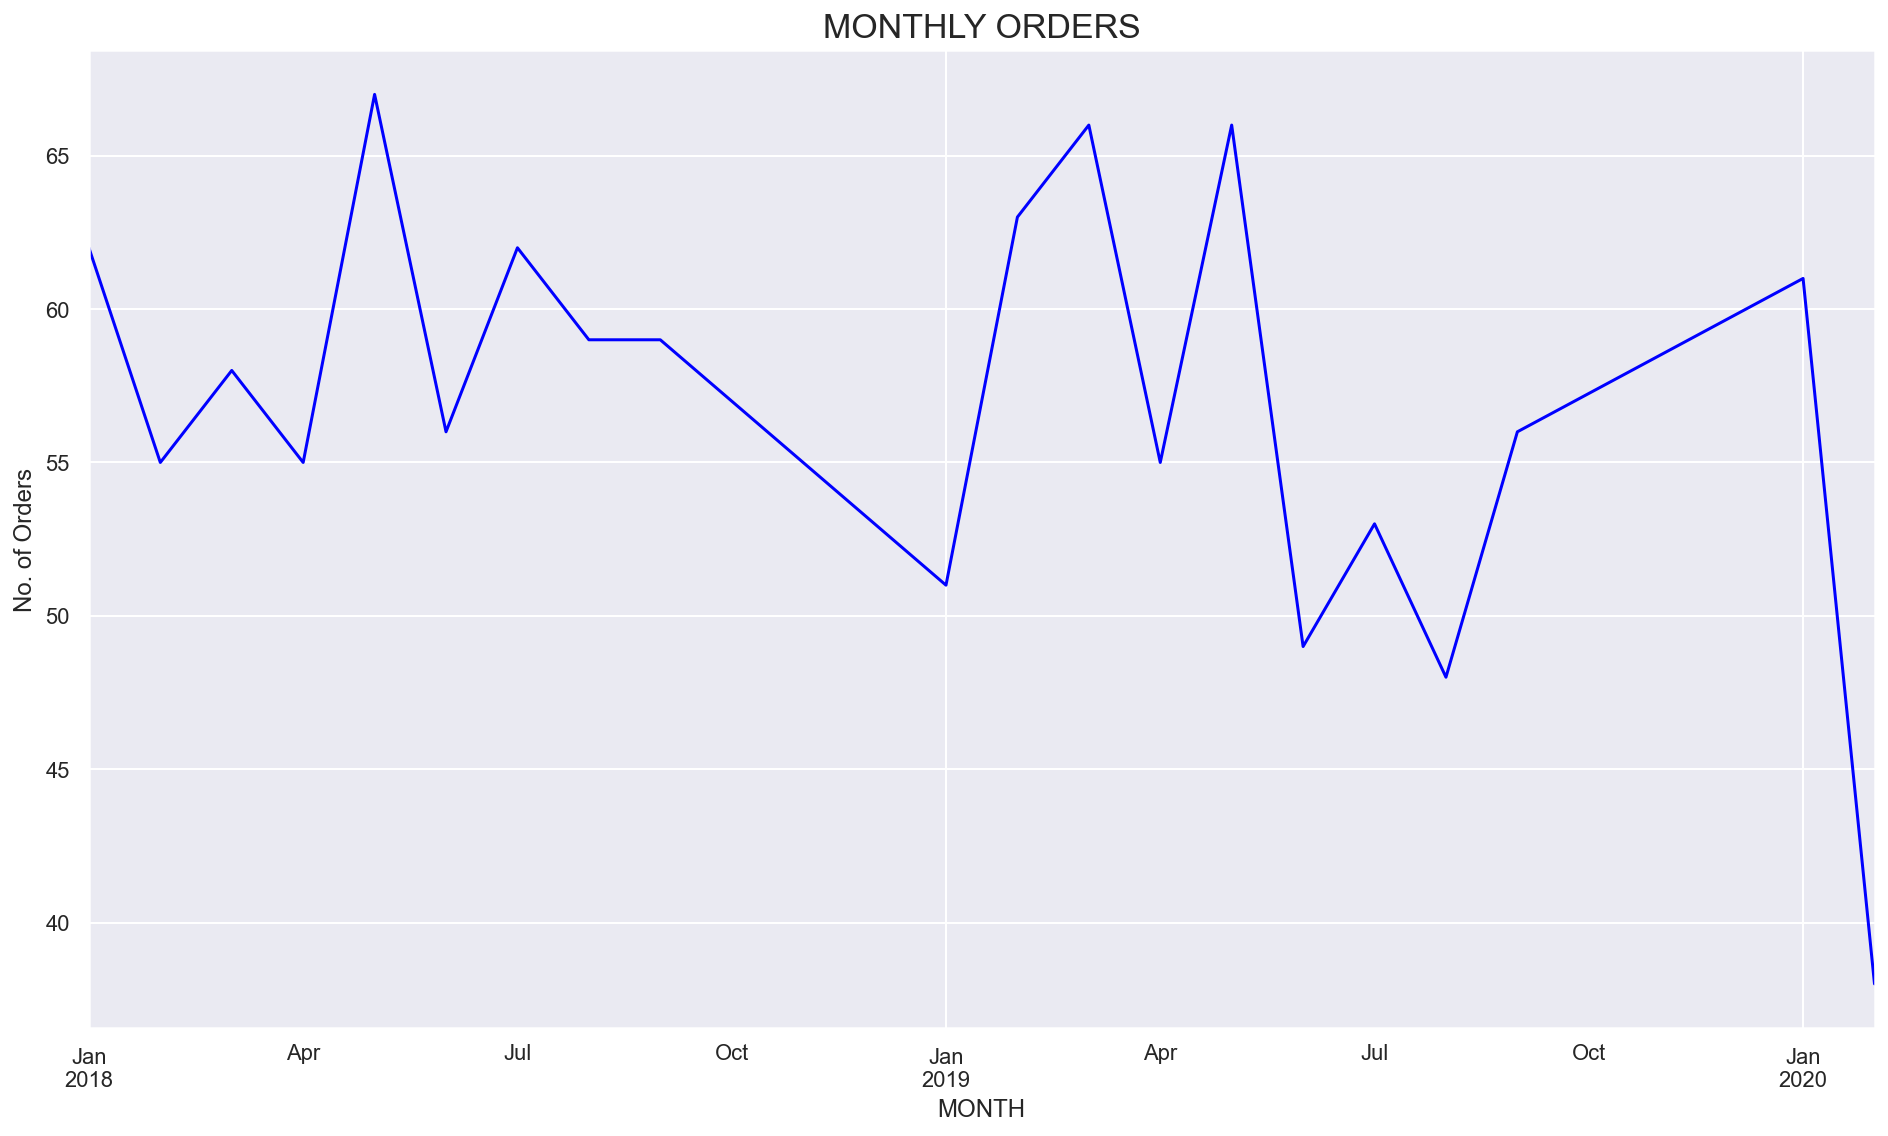

In [26]:
df_month['Num_of_Orders'].plot(color='blue');
plt.ylabel('No. of Orders');
plt.title('MONTHLY ORDERS', fontsize=17)
plt.savefig('ts_month_orders.jpg', bbox_inches='tight');

In [27]:
df3 = df_datesplit.copy()
df_week = pd.DataFrame(df3[['WEEK', 'Order_id', 'Product']].groupby('WEEK').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_week.rename(columns=newname, inplace=True)
df_week

,Num_of_Orders,Num_of_Products
WEEK,,
2018-01-01/2018-01-07,15,285
2018-01-08/2018-01-14,15,247
2018-01-15/2018-01-21,17,350
2018-01-22/2018-01-28,8,151
2018-01-29/2018-02-04,17,304
...,...,...
2020-01-27/2020-02-02,10,204
2020-02-03/2020-02-09,13,202
2020-02-10/2020-02-16,10,183


In [28]:
df_week['Num_of_Orders'].mean()
df_week['Num_of_Orders'].median()

12.943181818181818

13.0

In [29]:
df_week['Num_of_Products'].mean()
df_week['Num_of_Products'].median()

234.5568181818182

232.0

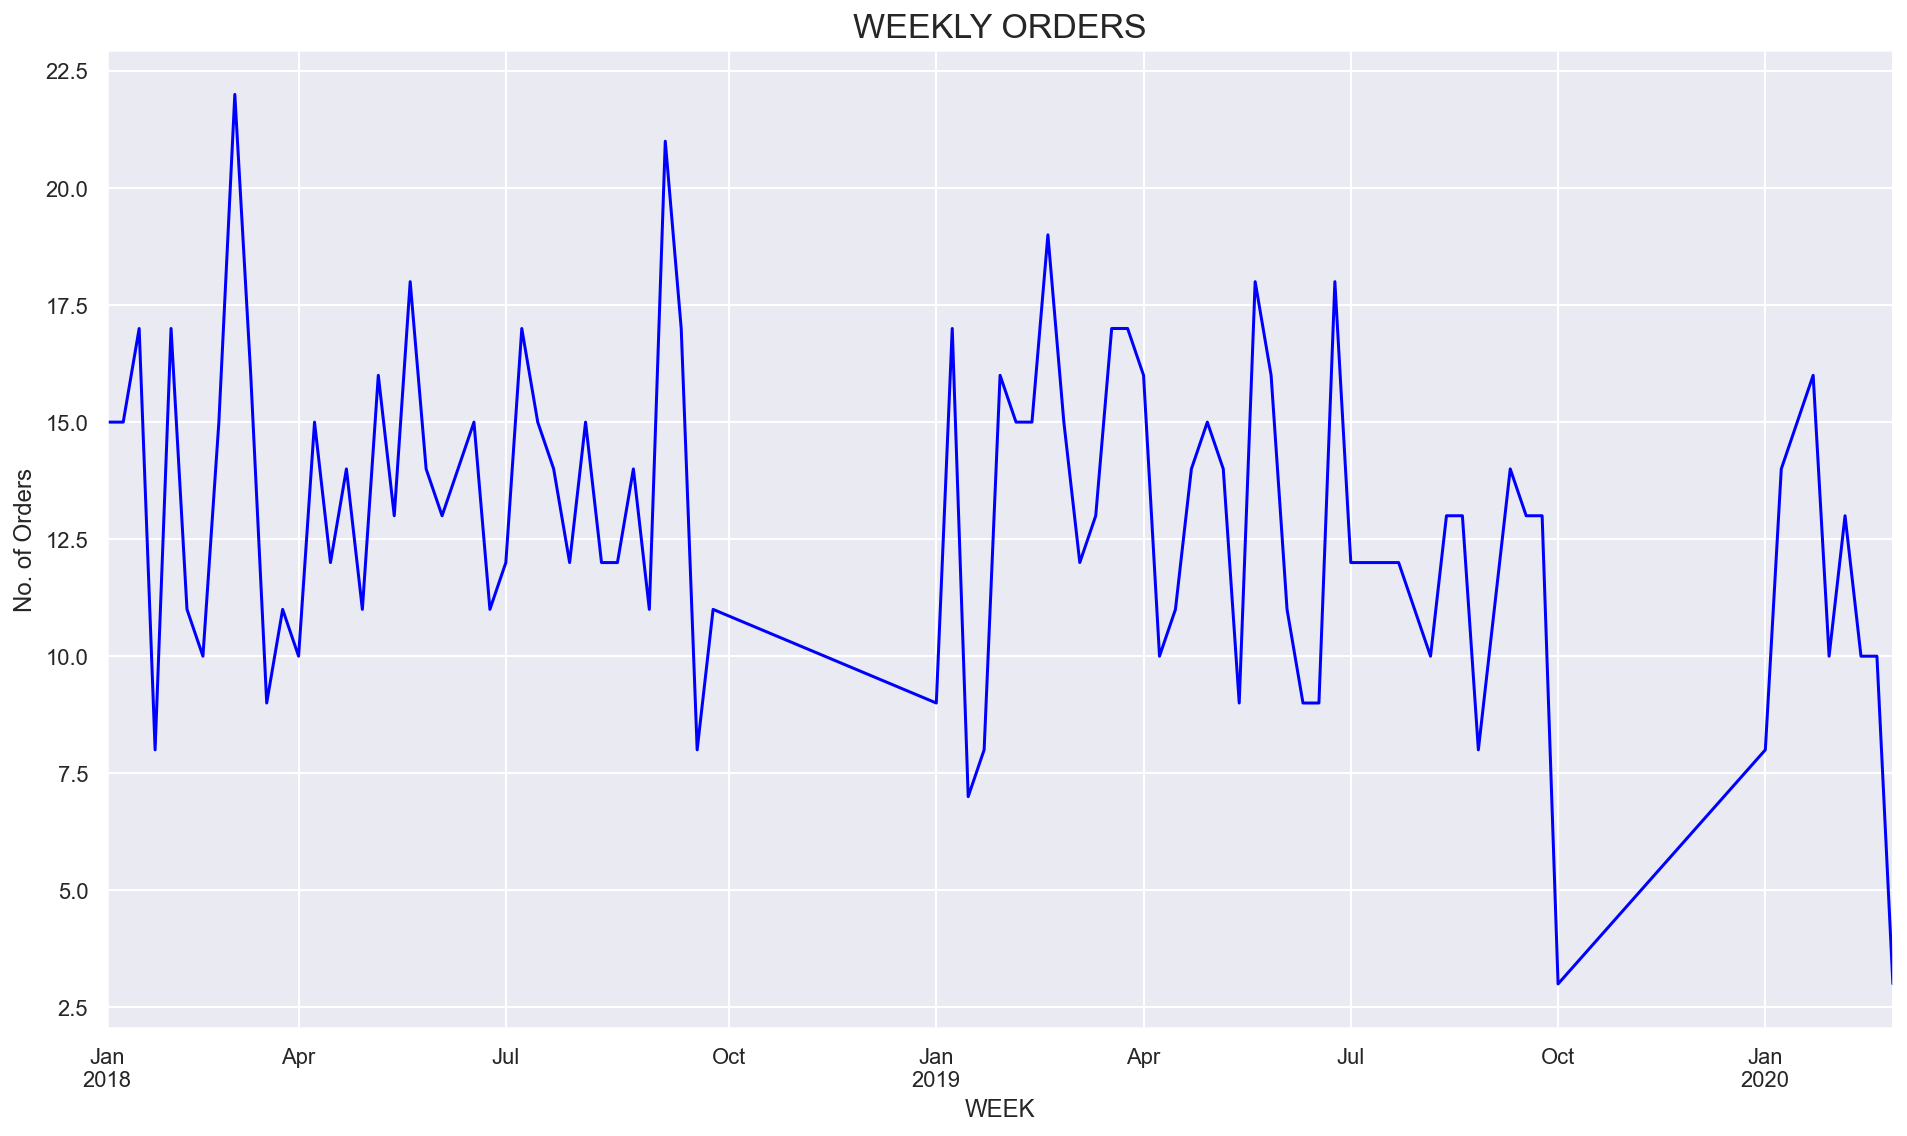

In [30]:
df_week['Num_of_Orders'].plot(color='blue');
plt.ylabel('No. of Orders');
plt.title('WEEKLY ORDERS', fontsize=17)
plt.savefig('ts_week_orders.jpg', bbox_inches='tight');

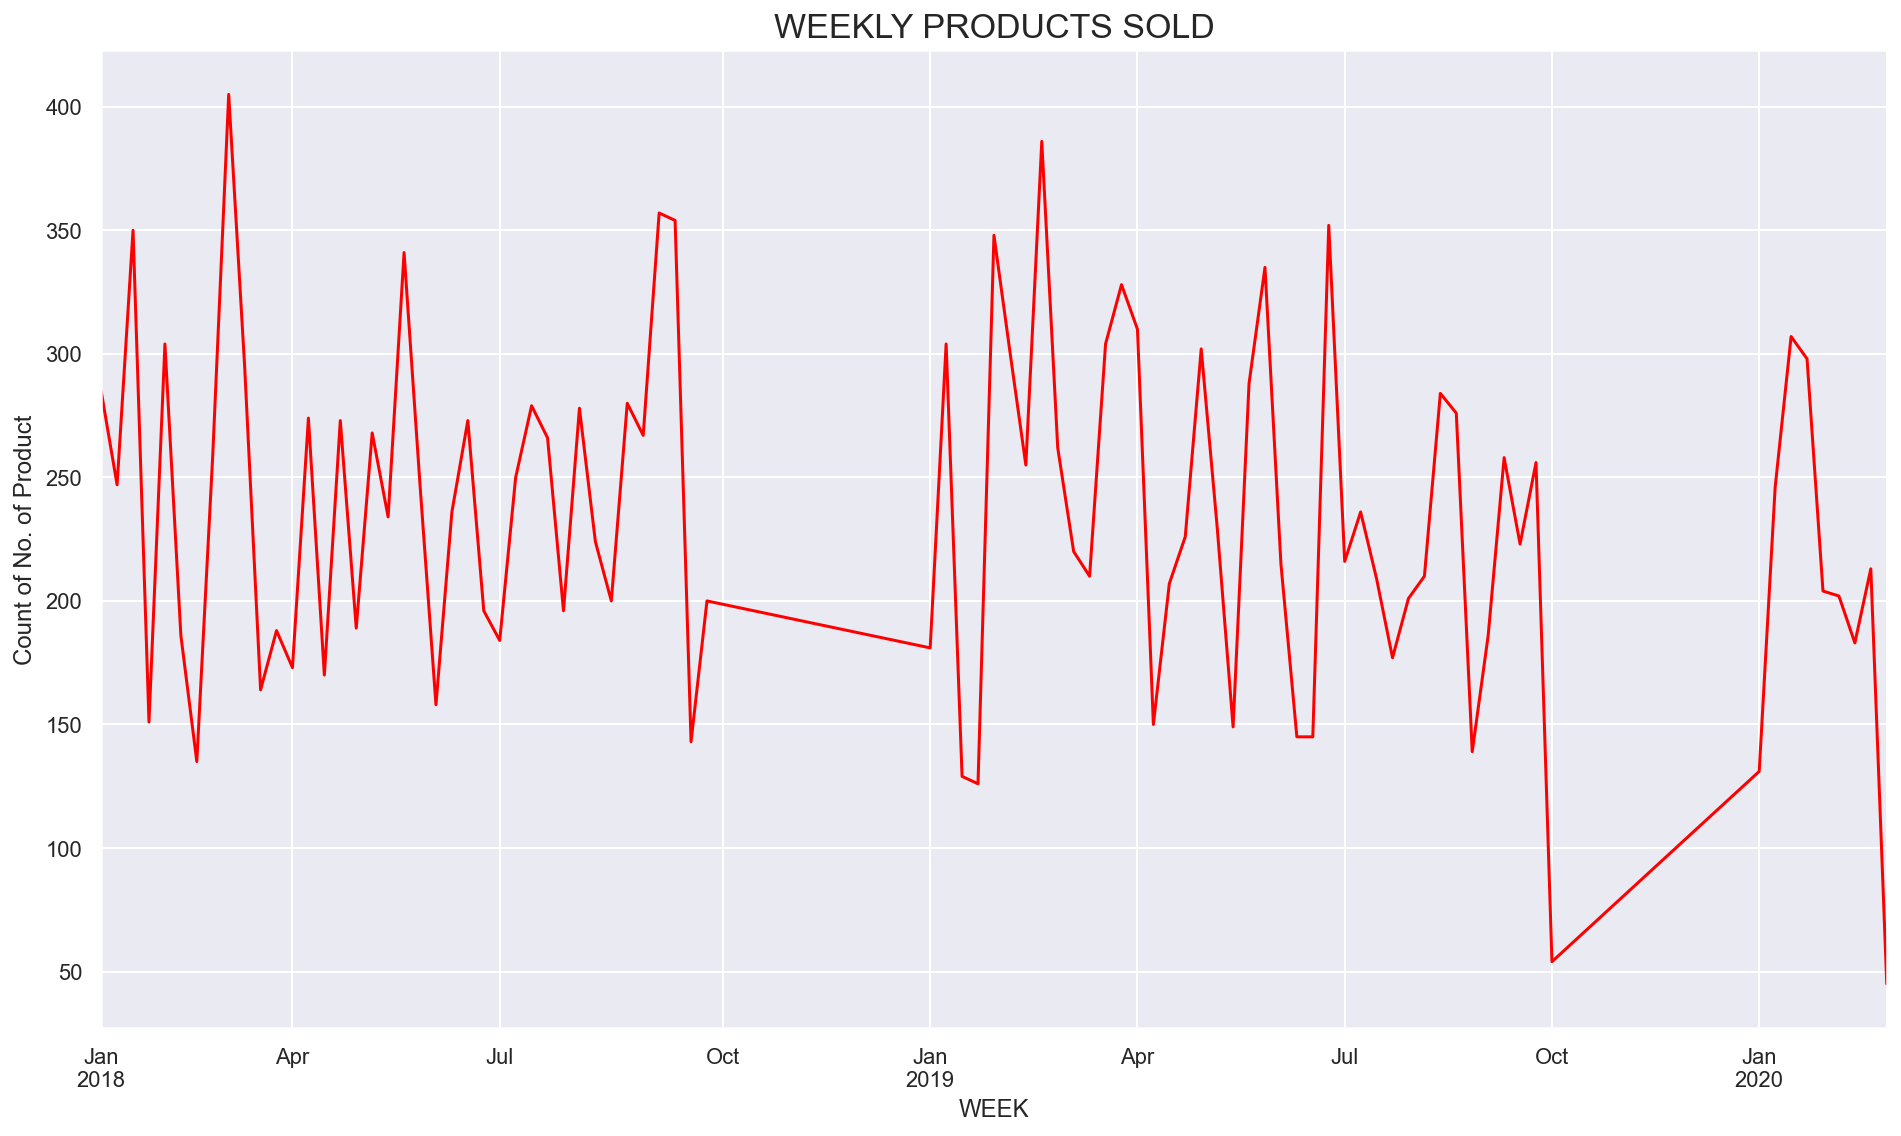

In [31]:
df_week['Num_of_Products'].plot(color='red');
plt.ylabel('Count of No. of Product');
plt.title('WEEKLY PRODUCTS SOLD', fontsize=17)
plt.savefig('ts_week_product.jpg', bbox_inches='tight');

In [32]:
df['Product'].value_counts()

poultry                         640
soda                            597
cereals                         591
ice cream                       579
cheeses                         578
waffles                         575
soap                            574
bagels                          573
lunch meat                      573
juice                           570
eggs                            570
toilet paper                    569
dinner rolls                    567
aluminum foil                   566
coffee/tea                      565
shampoo                         562
beef                            561
paper towels                    556
milk                            555
butter                          555
flour                           555
mixes                           554
dishwashing liquid/detergent    551
all- purpose                    551
ketchup                         548
yogurt                          545
individual meals                544
tortillas                   

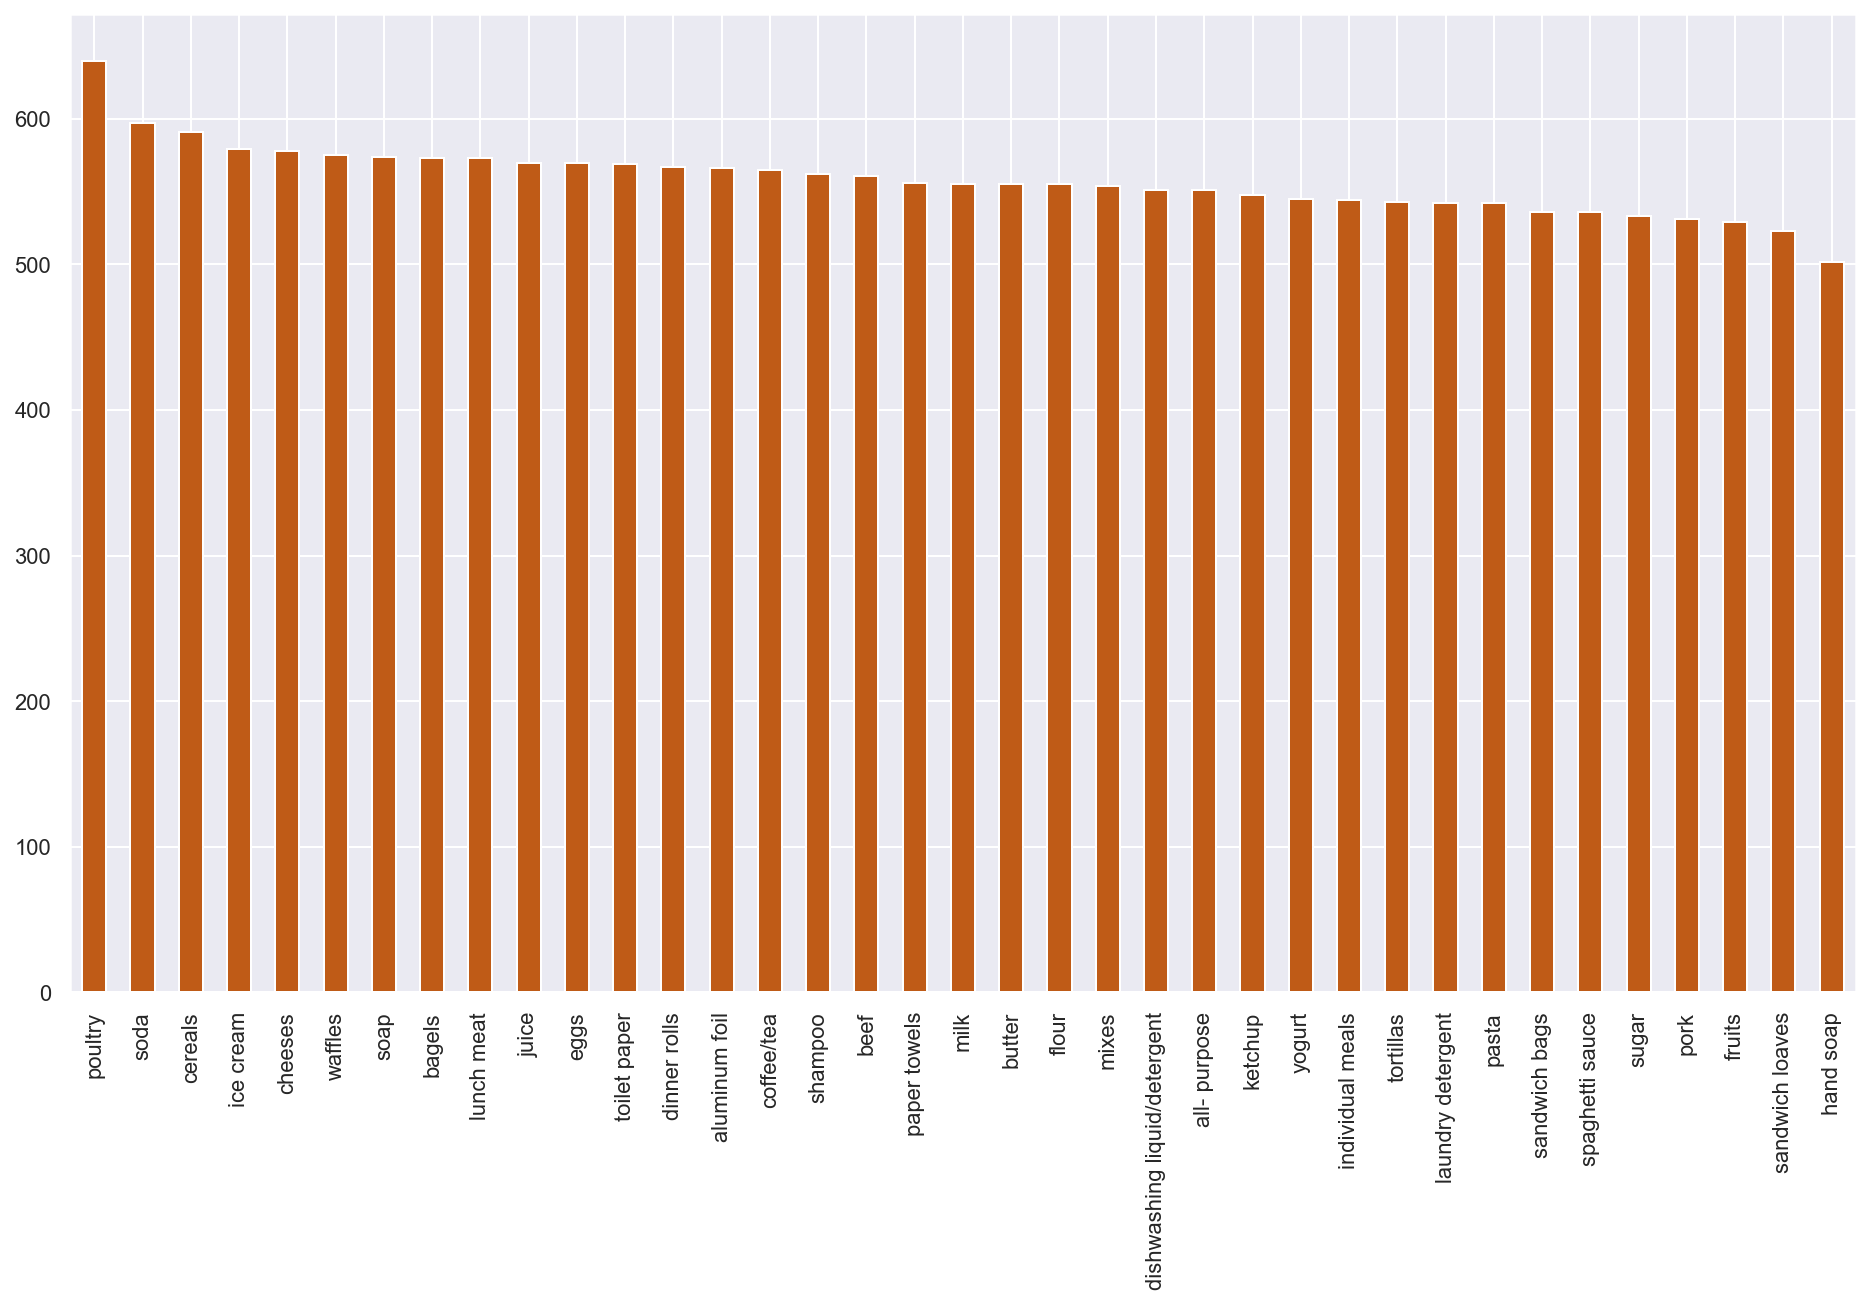

In [33]:
df['Product'].value_counts().plot(kind='bar');
plt.savefig('prod_bar.jpg', bbox_inches='tight');

In [34]:
df3 = df_datesplit.copy()
df_day = pd.DataFrame(df3[['DAY', 'Order_id', 'Product']].groupby('DAY').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_day.rename(columns=newname, inplace=True)
df_day

,Num_of_Orders,Num_of_Products
DAY,,
Friday,167,3044
Monday,143,2600
Saturday,169,2988
Sunday,169,3109
Thursday,167,2969
Tuesday,157,2943
Wednesday,167,2988


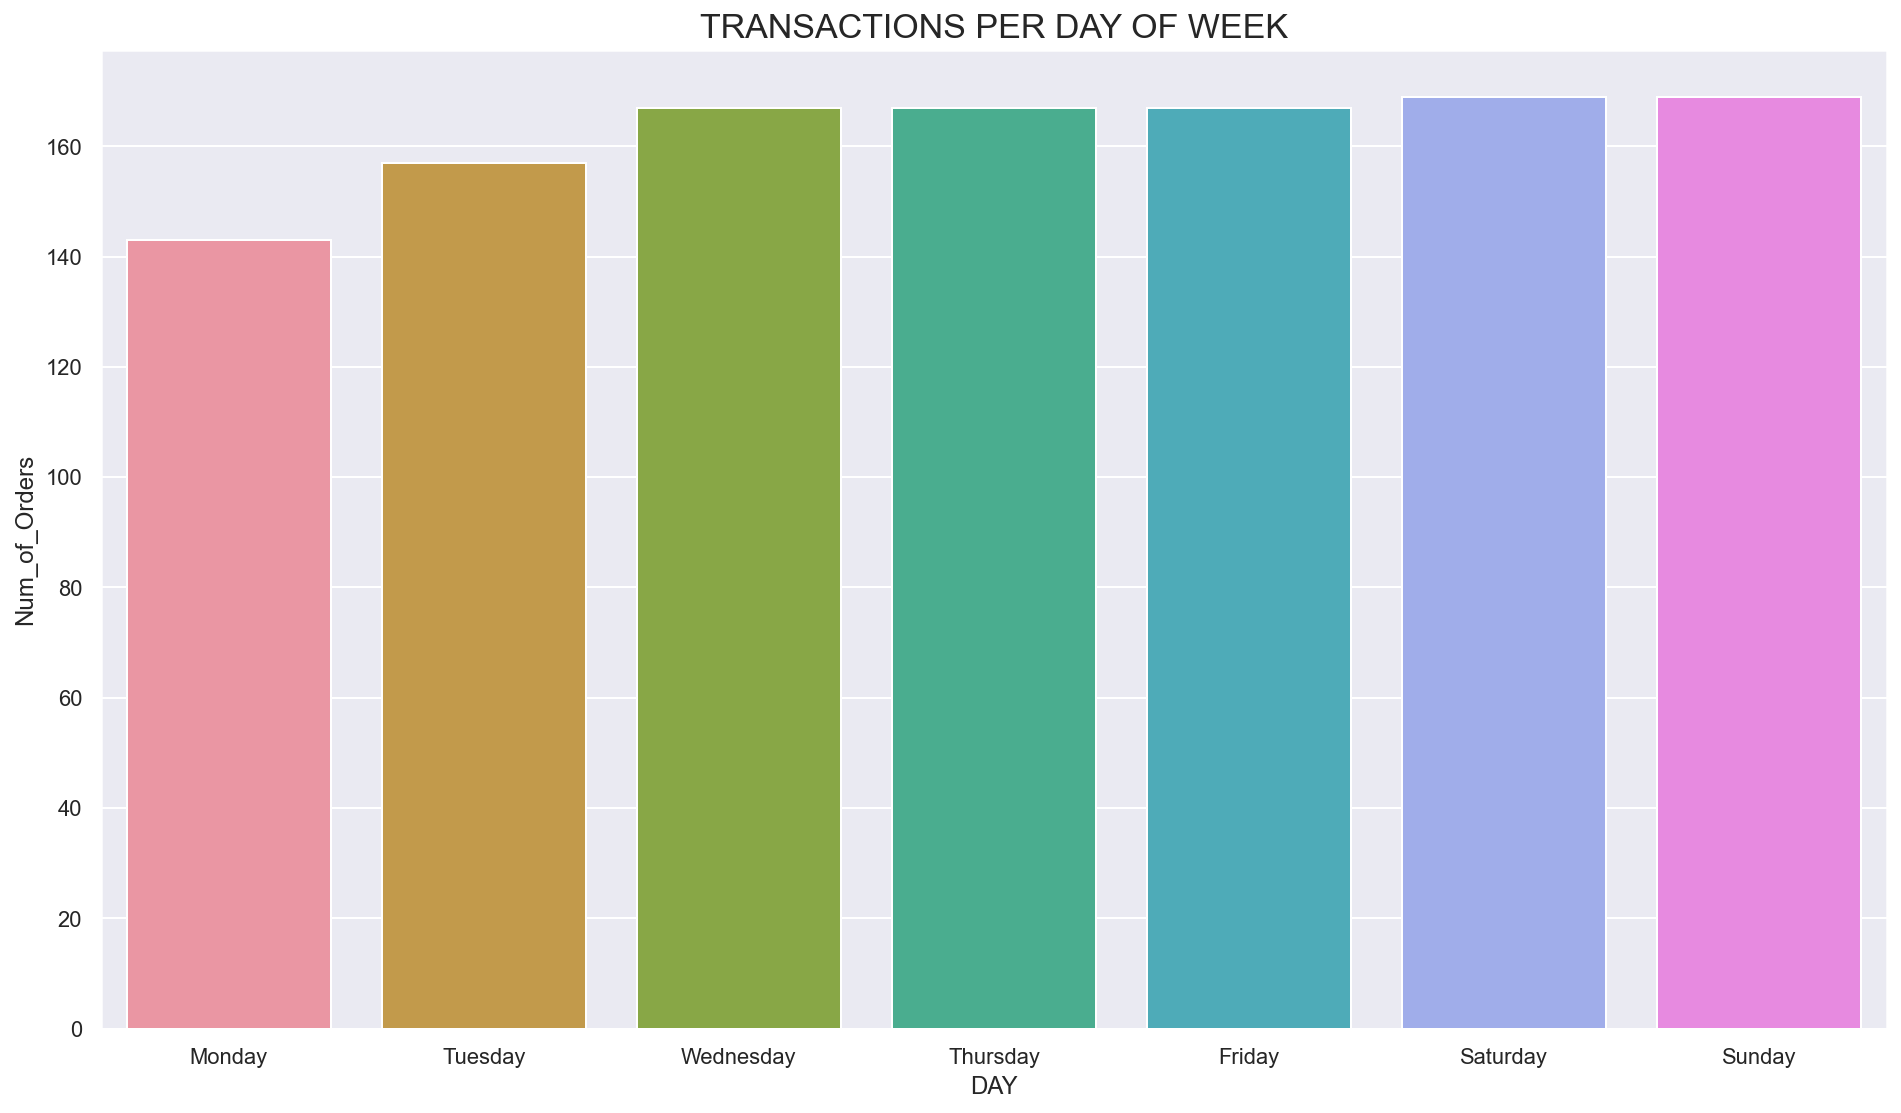

In [35]:
sns.barplot(x=df_day.index.sort_values(ascending=True), y=df_day['Num_of_Orders'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);
plt.title('TRANSACTIONS PER DAY OF WEEK', fontsize=17);
plt.savefig('week_bar.jpg', bbox_inches='tight');

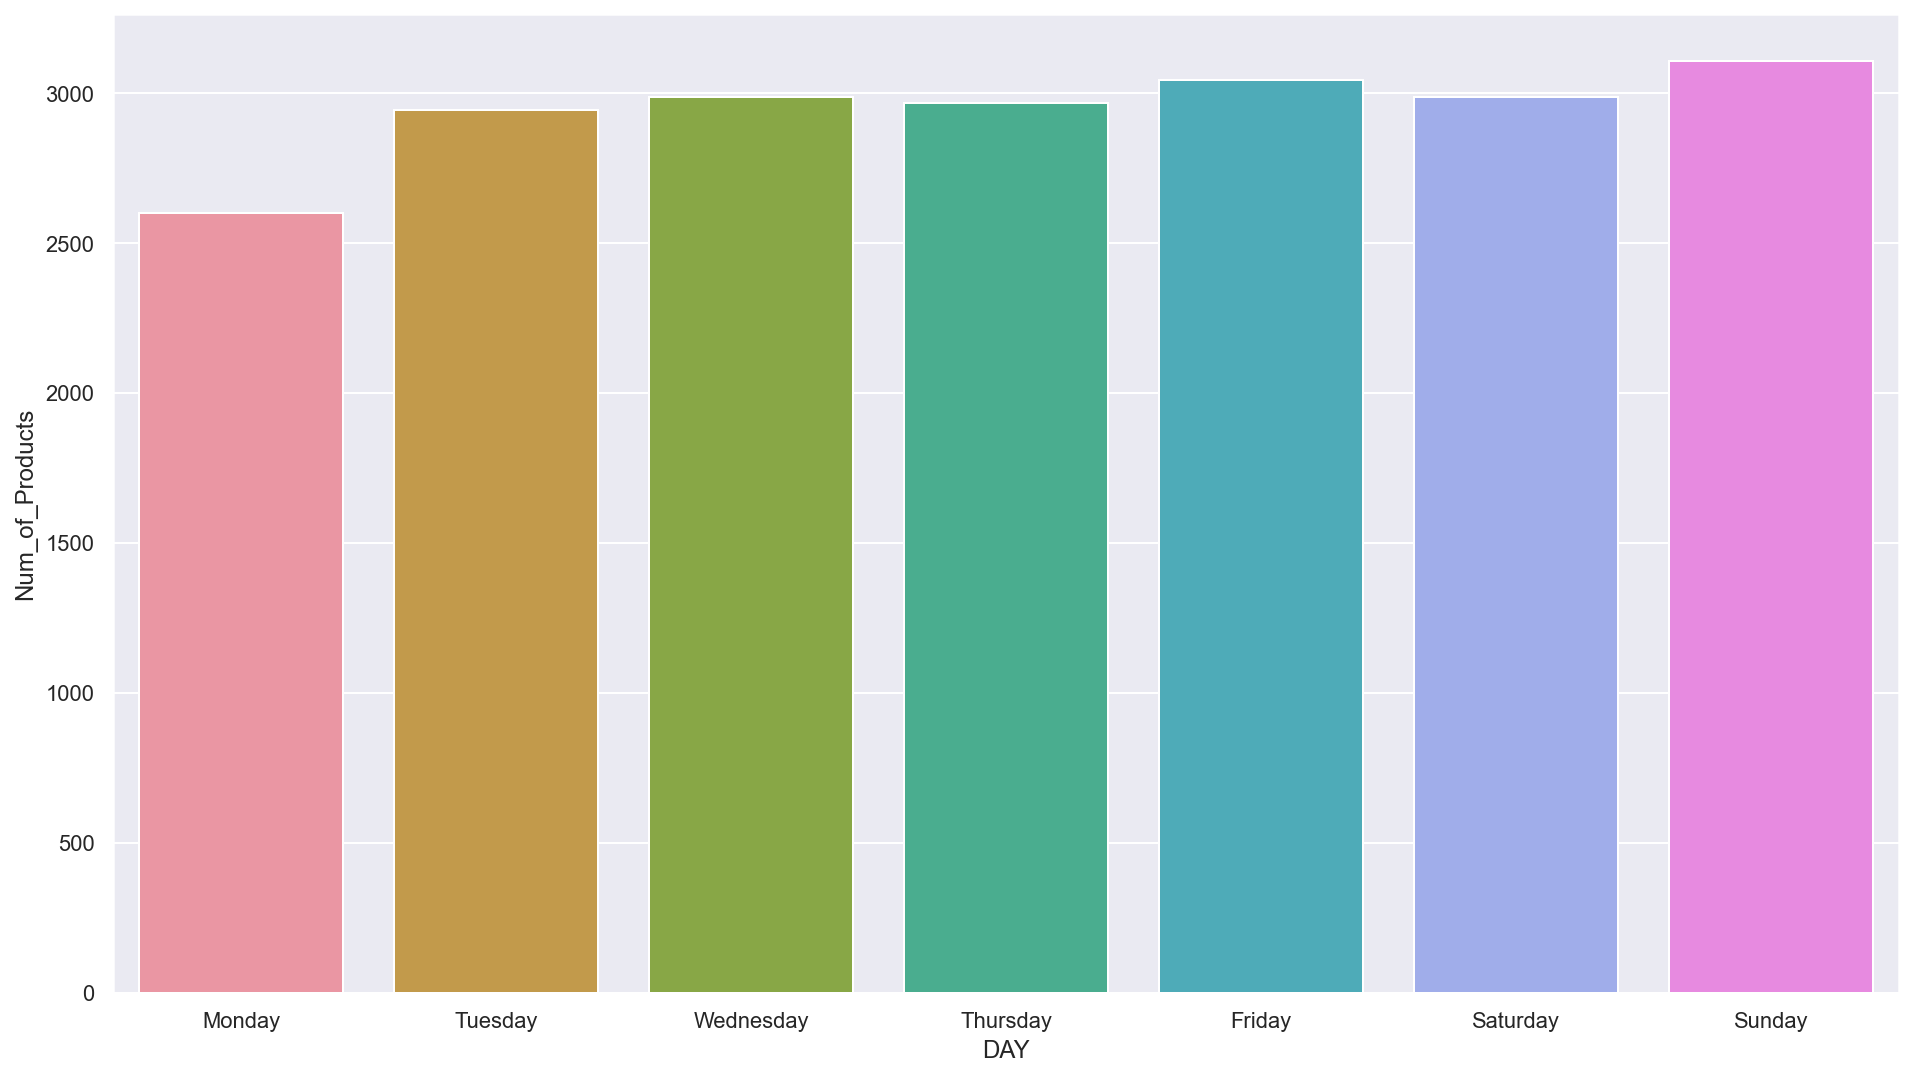

In [39]:
sns.barplot(x=df_day.index.sort_values(ascending=True), y=df_day['Num_of_Products'], order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']);

In [40]:
df3 = df_datesplit.copy()
df_monthname = pd.DataFrame(df3[['MONTH_NAME', 'Order_id', 'Product']].groupby('MONTH_NAME').agg({'Order_id': 'nunique',
                                                                  'Product': 'count'}))
newname = {'Order_id': 'Num_of_Orders', 'Product': 'Num_of_Products'}
df_monthname.rename(columns=newname, inplace=True)
df_monthname

,Num_of_Orders,Num_of_Products
MONTH_NAME,,
Apr,110,1937
Aug,107,2120
Feb,156,2815
Jan,174,3227
Jul,115,1997
Jun,105,1827
Mar,124,2255
May,133,2337
Sep,115,2126


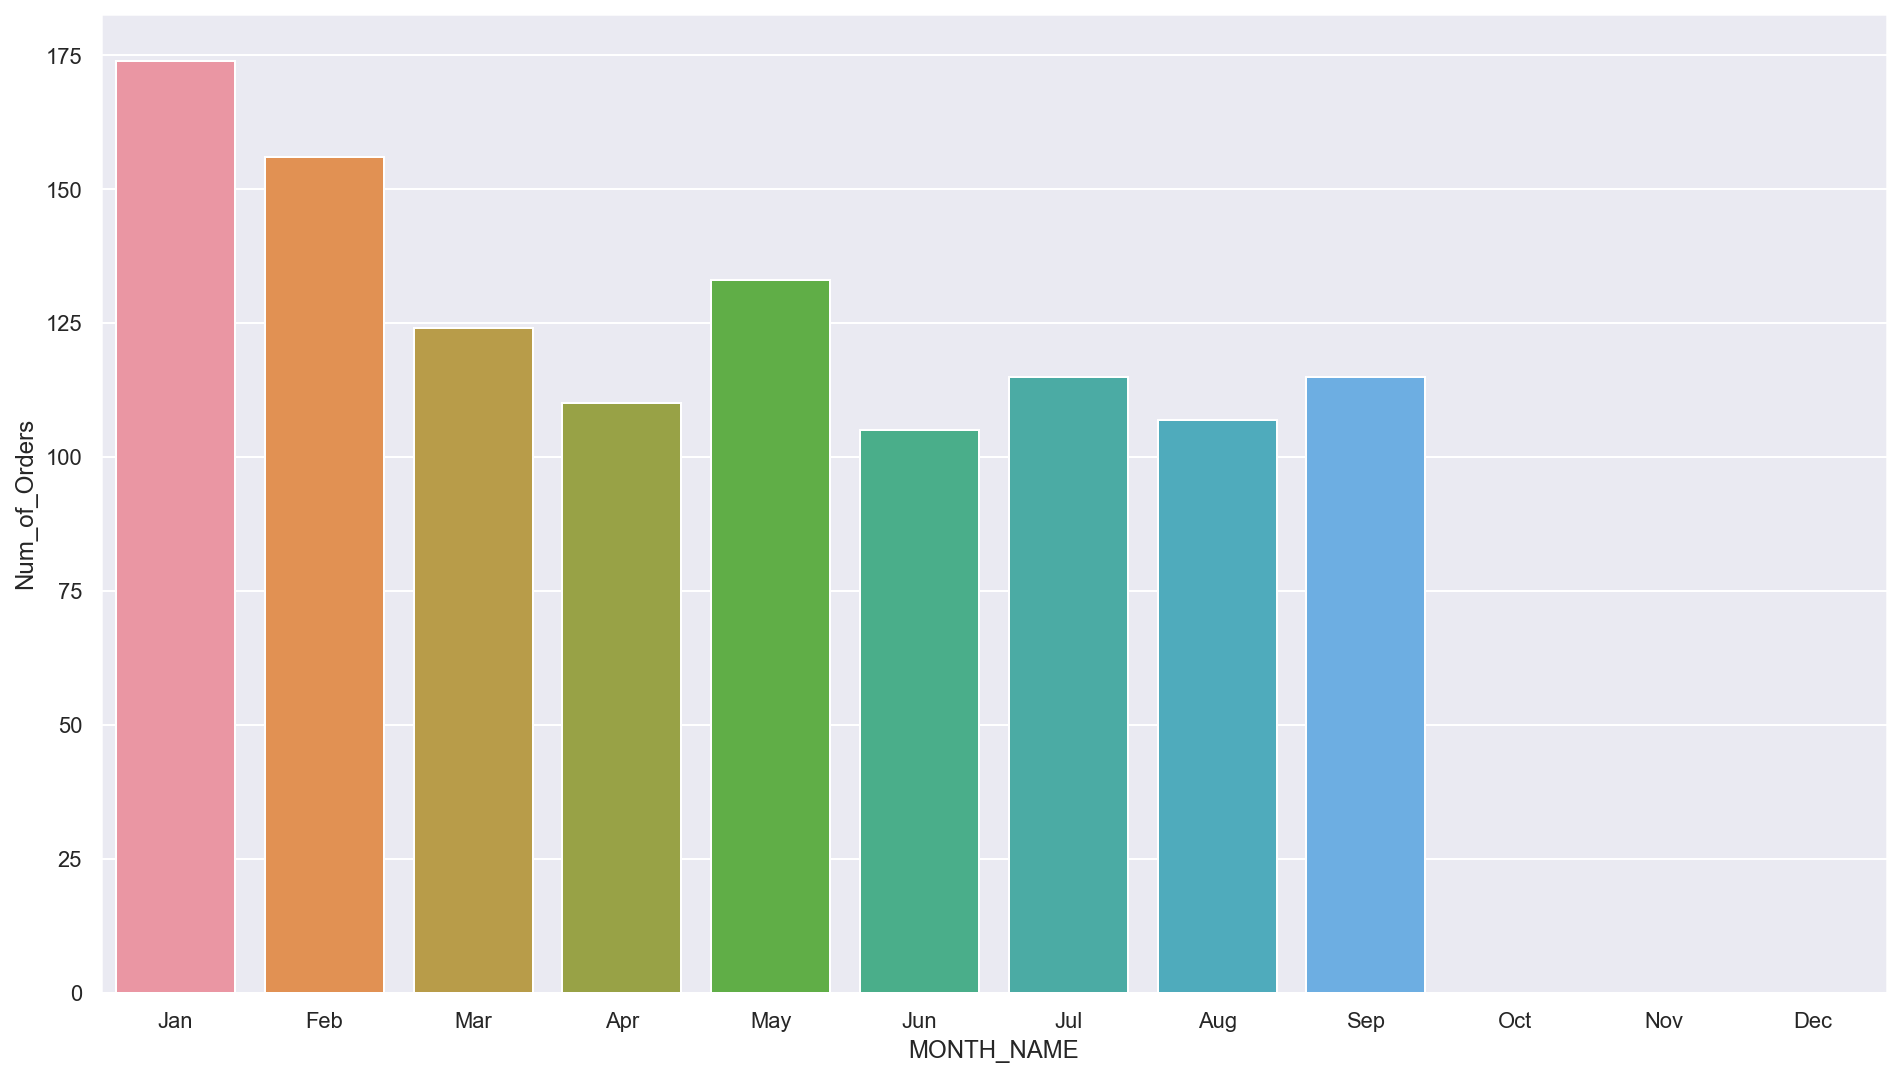

In [41]:
sns.barplot(x=df_monthname.index, y=df_monthname['Num_of_Orders'], order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.savefig('monthwise_orders.jpg', bbox_inches='tight');

In [42]:
df.head()

,Date,Order_id,Product
0,2018-01-01,1,yogurt
1,2018-01-01,1,pork
2,2018-01-01,1,sandwich bags
3,2018-01-01,1,lunch meat
4,2018-01-01,1,all- purpose


In [43]:
df_grpbydate = pd.DataFrame(df.groupby('Date').agg({'Order_id': 'nunique', 'Product': 'count'}))
df_grpbydate.head()
print('Total Num of Orders (Invoices) =', sum(df_grpbydate['Order_id']))
print('Total Num of Products  =', sum(df_grpbydate['Product']))

,Order_id,Product
Date,,
2018-01-01,2,39
2018-01-02,4,80
2018-01-03,1,22
2018-01-04,2,13
2018-01-05,2,60


Total Num of Orders (Invoices) = 1139
Total Num of Products  = 20641
